## Basics

In [1]:
import MVMBfunctions

In [2]:
import importlib

In [3]:
import numpy as np

In [4]:
importlib.reload(MVMBfunctions)

<module 'MVMBfunctions' from '/home/markus/Documents/MVMBfunctions/MVMBfunctions.py'>

In [5]:
base_functions = [lambda x,y:np.multiply(x,y),lambda x,y:np.add(x,y),lambda x,y:np.subtract(x,y),lambda x,y:np.divide(x,y),lambda x,y:np.divide(y,x)]

In [6]:
mvmbfunctions = MVMBfunctions.MVMBfunctions(base_functions,[[0.1,2],[0.1,2]])

In [7]:
mvmbfunctions.change_multipliers([2]*5)

In [8]:
mvmbfunctions.evaluate(1,2)

13.0

In [9]:
mvmbfunctions.get_limits()

(4.42, 20.0)

## Function approximation

In [10]:
xs = np.linspace(1,10,10)
ys = np.linspace(1,10,10)
Xs = []
Ys = []
for x in xs:
    for y in ys:
        Xs.append(x)
        Ys.append(y)

In [11]:
zs = [np.random.rand()*10+x*y for x,y in zip(Xs,Ys)]

In [12]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [13]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [14]:
def parametrized_function(x,*argv):
    mvmbfunction = MVMBfunctions.MVMBfunctions(base_functions,[[0.1,10]]*2)
    mvmbfunction.change_multipliers(argv)
    return mvmbfunction.evaluate(np.array([x_[0] for x_ in x]),np.array([x_[1] for x_ in x]),toAssert=False)
    
res = curve_fit(parametrized_function,[(x,y) for (x,y) in zip(Xs,Ys)],zs,p0=[0]*5)

In [15]:
res

(array([ 0.90543086,  0.66594549, -0.23423074,  0.33752819, -0.26030618]),
 array([[ 1.63440665e-03, -6.86262871e-03, -2.28326201e-09,
          7.49381376e-03,  7.49380827e-03],
        [-6.86262871e-03,  3.04606493e-02,  9.14975533e-09,
         -3.54279848e-02, -3.54279636e-02],
        [-2.28326201e-09,  9.14975533e-09,  3.04606449e-02,
         -3.54279805e-02,  3.54279590e-02],
        [ 7.49381376e-03, -3.54279848e-02, -3.54279805e-02,
          1.01196028e-01,  3.89576349e-09],
        [ 7.49380827e-03, -3.54279636e-02,  3.54279590e-02,
          3.89576352e-09,  1.01195981e-01]]))

<IPython.core.display.Javascript object>


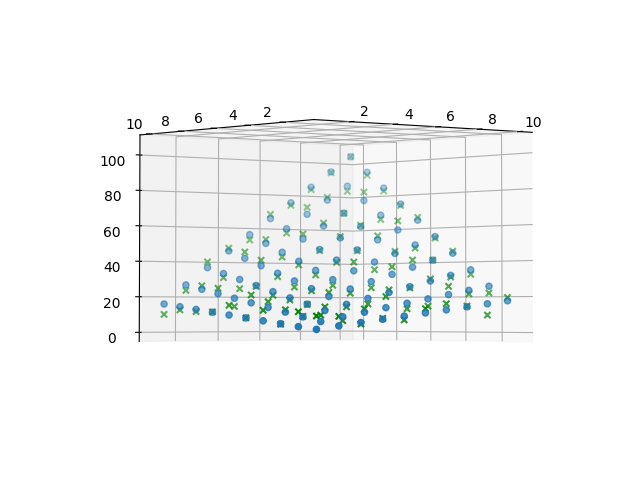

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xs,Ys,zs,marker="x",color="green")
mvmbfunction = MVMBfunctions.MVMBfunctions(base_functions,[[0.1,10]]*2)
mvmbfunction.change_multipliers(res[0])
Zs = [mvmbfunction.evaluate(x,y) for (x,y) in zip(Xs,Ys)]
ax.scatter(Xs,Ys,Zs)